In [ ]:
from wattameter.utils import file_to_df, align_and_concat_df
import matplotlib.pyplot as plt
import re
import marimo as mo

In [ ]:
_files = [
    "nvml_wattameter.log",
    "rapl_wattameter.log",
]
df = align_and_concat_df([file_to_df(open(f)) for f in _files], start_at_0=True)

# Add a few columns
_cpu_power_columns = [col for col in df.columns if re.search(r"cpu-\d+\[W\]", col)]
_gpu_power_columns = [col for col in df.columns if re.search(r"gpu-\d+\[mW\]", col)]
_readt_columns = [col for col in df.columns if "reading-time" in col]
if len(_cpu_power_columns) > 1:
    df["cpu_power[W]"] = df[_cpu_power_columns].sum(axis=1)
if len(_gpu_power_columns) > 1:
    df["gpu_power[W]"] = df[_gpu_power_columns].sum(axis=1) * 1e-3
if len(_cpu_power_columns) > 1 and len(_gpu_power_columns) > 1:
    df["total_power[W]"] = df["cpu_power[W]"] + df["gpu_power[W]"]
if len(_readt_columns) > 1:
    df["total_readt[s]"] = df[_readt_columns].sum(axis=1) * 1e-9

df

Average dt per node: [0.10108819424460432, 0.1010881726618705]
Using dt = 0.10108818345323742 seconds
Common start time = 2025-10-07 09:38:40.623688
Common end time = 2025-10-07 09:38:54.674885


In [ ]:
array_ui = mo.ui.array(
    [
        mo.ui.multiselect(
            df.columns, value=["total_power[W]", "cpu_power[W]", "gpu_power[W]"]
        ),
        mo.ui.checkbox(label="Log scale", value=False),
    ]
)
array_ui

<marimo-json-output data-json-data='["text/html:<marimo-ui-element object-id='vblA-2' random-id='d36cf12a-7606-0843-dbcf-97331a3deb71'><marimo-multiselect data-initial-value='[&quot;total_power[W]&quot;,&quot;cpu_power[W]&quot;,&quot;gpu_power[W]&quot;]' data-label='null' data-options='[&quot;0_gpu-0[C]&quot;,&quot;0_gpu-0[mW]&quot;,&quot;0_gpu-1[C]&quot;,&quot;0_gpu-1[mW]&quot;,&quot;0_gpu-2[C]&quot;,&quot;0_gpu-2[mW]&quot;,&quot;0_gpu-3[C]&quot;,&quot;0_gpu-3[mW]&quot;,&quot;0_reading-time[ns]&quot;,&quot;1_cpu-0-core[W]&quot;,&quot;1_cpu-0-core[uJ]&quot;,&quot;1_cpu-0[W]&quot;,&quot;1_cpu-0[uJ]&quot;,&quot;1_cpu-1-core[W]&quot;,&quot;1_cpu-1-core[uJ]&quot;,&quot;1_cpu-1[W]&quot;,&quot;1_cpu-1[uJ]&quot;,&quot;1_reading-time[ns]&quot;,&quot;cpu_power[W]&quot;,&quot;gpu_power[W]&quot;,&quot;total_power[W]&quot;,&quot;total_readt[s]&quot;]' data-full-width='false'></marimo-multiselect></marimo-ui-element>","text/html:<marimo-ui-element object-id='vblA-3' random-id='c8e64210-63e8-db2f-a73e-ec070c9094f5'><marimo-checkbox data-initial-value='false' data-label='&quot;&lt;span class=&#92;&quot;markdown prose dark:prose-invert&#92;&quot;&gt;&lt;span class=&#92;&quot;paragraph&#92;&quot;&gt;Log scale&lt;/span&gt;&lt;/span&gt;&quot;' data-disabled='false'></marimo-checkbox></marimo-ui-element>"]' data-value-types='"python"' data-name='"array"'>

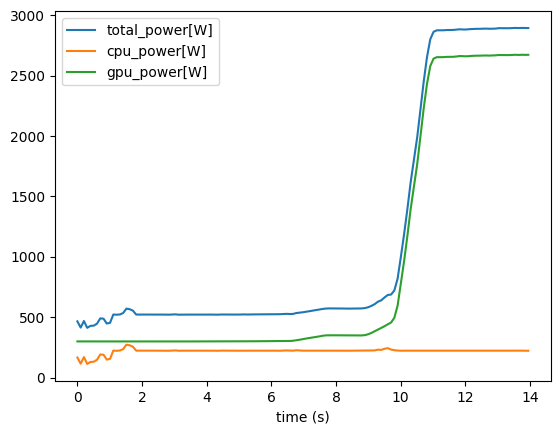

In [ ]:
columns = array_ui[0].value
_logy = array_ui[1].value

if columns:
    df[columns].plot(style="-")
    plt.xlabel("time (s)")
    if _logy:
        plt.yscale("log")
    plt.legend()
    plt.show()

In [ ]:
for _col in columns:
    print(f"{_col}:")
    print(f"  Avg    = {df[_col].mean()}")
    print(f"  Std    = {df[_col].std()}")
    print(f"  Median = {df[_col].median()}")
    print(f"  Min    = {df[_col].min()}")
    print(f"  Max    = {df[_col].max()}")

total_power[W]:
  Avg    = 1144.2706412815694
  Std    = 996.6000048819272
  Median = 553.7266493090111
  Min    = 411.45845637811897
  Max    = 2895.651959781489
cpu_power[W]:
  Avg    = 218.22752952369177
  Std    = 22.335251231382298
  Median = 222.44072809471635
  Min    = 112.63537821282367
  Max    = 271.96894328344763
gpu_power[W]:
  Avg    = 926.0431117578773
  Std    = 993.7076173308683
  Median = 318.12143983903314
  Min    = 298.55647496511216
  Max    = 2673.152501228124
